© 2018 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](central_limit_theorem.ipynb).
___

# Objective 

In this tutorial, we will discuss what the central limit theorem is and illustrate it through a computational simulation. This exercise helps illuminate why "bell curve" distributions occur so frequently. 

# The Central Limit Theorem 

The Central Limit Theorem states that when multiple independent random variables are averaged, the resulting averages will tend toward a normal distribution even if the original random variables were not themselves normally distributed. Stated this way might seem a bit obscure, but this theorem explains why many measurements that we might make (like the height of people) are distributed in the iconic “bell curve.” This is because such values can be the result of many other variables like genetics, environment, and diet. 

While taking repeated measurements in the lab can often be quite onerous, we can computationally simulate the process of repeated measurements quite easily and see the central limit theorem in action! 

# Producing uniform random variables

In [1]:
# Import the necessary modules
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plotsw
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

Once again, we will make use of `numpy`'s `random.uniform()` to produce random numbers, as illustrated below.

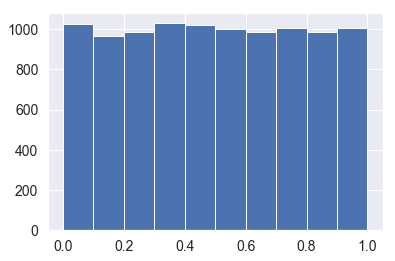

In [2]:
# produce a list of 10000 random variables 
rand_vars = np.random.uniform(size=10000)
plt.hist(rand_vars);

Importantly, these variables are *not* normally distributed, which makes them serve as ideal candidates for illustrating the central limit theorem. To this end, let's repeatedly draw 10 random numbers from this uniform distribution, average them, and plot the histogram of many of these averages. 

# Illustrating the central limit theorem with uniformly distributed variables

Text(0,0.5,'frequency')

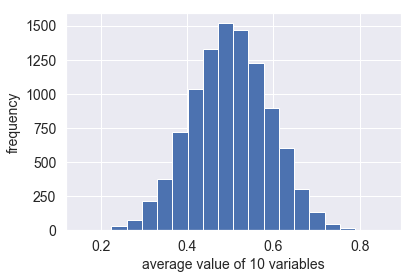

In [3]:
# specify the number of trials to be done
num_trials = 10000

# initalize array in which to store averages
avgs = np.zeros(num_trials)

# for num_trials times, get 10 random numbers and average them
for i in range(num_trials):
    rand_vars = np.random.uniform(size=10)
    avgs[i] = np.mean(rand_vars)

_ = plt.hist(avgs, bins=20)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency")

And we've found the bell curve! We've shown that even though the original variables were drawn from a uniform distribution, repeated trails of averaging these variables resulted in a normal distribution. To better see this, let's overlay a normal distribution on top of the histogram.

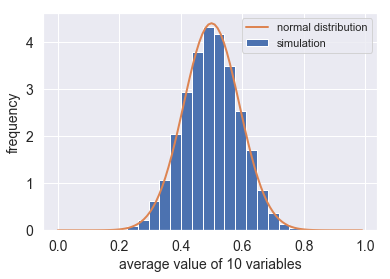

In [4]:
# specify range of x-values to be covered by normal distribution
x_vals = np.arange(0,1,0.01)

# determine standard deviation that should be used for the normal distribtuion 
std = np.std(avgs)

# use scipy's built in normal pdf 
normal_pdf = stats.norm.pdf(x_vals, loc=0.5, scale=std)

# plot the two distributions 
_ = plt.hist(avgs, bins=20, density=True) # setting the density variable normalizes the distribution
plt.plot(x_vals, normal_pdf)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency")
plt.legend(["normal distribution", "simulation"])

Definitely looks normal! To show this more convincingly, let's also plot the cumulative frequency histograms. 

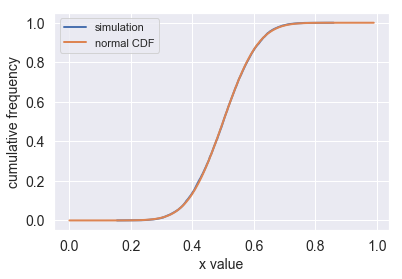

In [5]:
# plot the ECDF for our simulation
sorted_vals = np.sort(avgs)
y_vals = np.linspace(0, 1, len(sorted_vals))
plt.plot(sorted_vals, y_vals)

# plot CDF for normal distribution
normal_cdf = stats.norm.cdf(x_vals, loc=0.5, scale=std)
plt.plot(x_vals, normal_cdf)

# label plot
plt.xlabel("x value")
plt.ylabel("cumulative frequency")
plt.legend(["simulation", "normal CDF"])

# Trying the Central Limit Theorem with another distribution

What's so powerful by the Central Limit Theorem, is that it can work for any "kooky" distribution that we might pick (provided that the variance is not too large). Below we take the same approach for a triangular distribution, which is not only non-uniform, but also skewed!

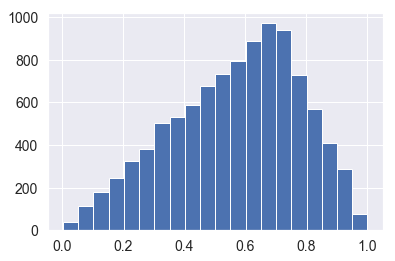

In [6]:
# produce a list of 1000 random variables 
rand_vars = np.random.triangular(0, 0.7, 1, size=10000)
plt.hist(rand_vars, bins=20);

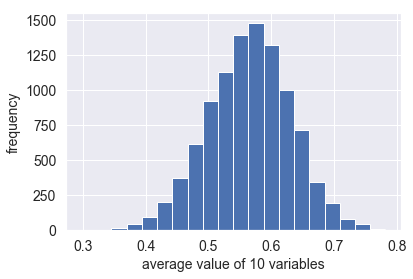

In [7]:
# specify the number of trials to be done
num_trials = 10000

# initalize array in which to store averages
avgs = np.zeros(num_trials)

# for num_trials times, get 10 random numbers and average them
for i in range(num_trials):
    rand_vars = np.random.triangular(0, 0.7, 1, size=10)
    avgs[i] = np.mean(rand_vars)

_ = plt.hist(avgs, bins=20)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency");

This also looks normally distributed even though the distribution we are pulling from is anything but. Let's plot a normal distribution on top to further convince ourselves. 

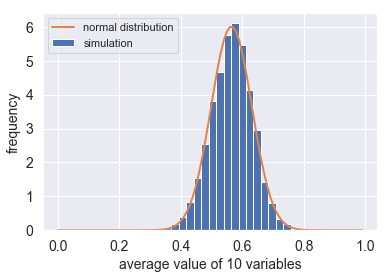

In [8]:
# specify range of x-values to be covered by normal distribution
x_vals = np.arange(0,1,0.01)

# determine standard deviation and mean that should be used
std = np.std(avgs)
mean = np.mean(avgs)

# use scipy's built in normal pdf 
normal_pdf = stats.norm.pdf(x_vals, loc=mean, scale=std)

# plot the two distributions 
_ = plt.hist(avgs, bins=20, density=True) # setting the density variable normalizes the distribution
plt.plot(x_vals, normal_pdf)
plt.xlabel("average value of 10 variables")
plt.ylabel("frequency")
plt.legend(["normal distribution", "simulation"]);

Wow! Even though we started with a bizarre distribution, the result of repeated averaged draws out of this distribution yields a normal distribution! And once again, let's show this with the CDFs as well.

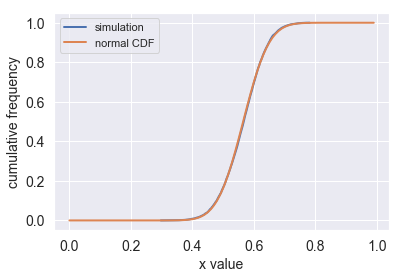

In [9]:
# plot the ECDF for our simulation
sorted_vals = np.sort(avgs)
y_vals = np.linspace(0, 1, len(sorted_vals))
plt.plot(sorted_vals, y_vals)

# plot CDF for normal distribution
normal_cdf = stats.norm.cdf(x_vals, loc=mean, scale=std)
plt.plot(x_vals, normal_cdf)

# label plot
plt.xlabel("x value")
plt.ylabel("cumulative frequency")
plt.legend(["simulation", "normal CDF"]);